# Implementation

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization, Input, RandomFlip, RandomRotation, Resizing,Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import cv2
import tensorflow_probability as tfp

In [ ]:
d_1 = tf.constant([5,4,6])

In [ ]:
print(d_1)

tf.Tensor([5 4 6], shape=(3,), dtype=int32)


In [ ]:
d_2 = tf.constant([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
print(d_2)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [ ]:
d_3 = tf.constant([
    [
        [1,2,3],
        [4,5,6]
    ],
    [
        [7,8,9],
        [0,2,1]
    ],
    [
        [3,4,5],
        [6,7,8]
    ]
])
print(d_3)

tf.Tensor(
[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]]

 [[3 4 5]
  [6 7 8]]], shape=(3, 2, 3), dtype=int32)


In [ ]:
d_4 = tf.constant([
    [
        [
          [1,2,3],[4,5,6]
        ],
        [
          [7,8,9],[0,2,1]
        ],
        [
          [3,4,5],[6,7,8]
        ]
    ],
    [
        [
          [10,2,83],[4,50,6]
        ],
        [
          [7,18,9],[0,12,1]
        ],
        [
          [3,4,15],[61,7,18]
        ]
    ]
], dtype=tf.float32)
print(d_4)

tf.Tensor(
[[[[ 1.  2.  3.]
   [ 4.  5.  6.]]

  [[ 7.  8.  9.]
   [ 0.  2.  1.]]

  [[ 3.  4.  5.]
   [ 6.  7.  8.]]]


 [[[10.  2. 83.]
   [ 4. 50.  6.]]

  [[ 7. 18.  9.]
   [ 0. 12.  1.]]

  [[ 3.  4. 15.]
   [61.  7. 18.]]]], shape=(2, 3, 2, 3), dtype=float32)


In [ ]:
print(d_4.shape)

(2, 3, 2, 3)


In [ ]:
print(d_4.ndim)

4


In [ ]:
casted_d_1 = tf.cast(d_1,dtype=tf.float64)
print(casted_d_1)

tf.Tensor([5. 4. 6.], shape=(3,), dtype=float64)


In [ ]:
tensor_bool = tf.constant([True,False,True,False])
print(tensor_bool)

tf.Tensor([ True False  True False], shape=(4,), dtype=bool)


In [ ]:
tensor_string = tf.constant(["hi","my","name","is","sajith"])
print(tensor_string)

tf.Tensor([b'hi' b'my' b'name' b'is' b'sajith'], shape=(5,), dtype=string)


In [ ]:
import numpy as np
np_array = np.array([1,2,3])
print(np_array)

[1 2 3]


In [ ]:
converted_tensor = tf.convert_to_tensor(np_array)
print(converted_tensor)

tf.Tensor([1 2 3], shape=(3,), dtype=int64)


In [ ]:
eye_tensor = tf.eye(
    num_rows = 3,
    num_columns = None,
    batch_shape = [2],
    dtype = tf.dtypes.float32,
    name = None
)
print(eye_tensor)

tf.Tensor(
[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]], shape=(2, 3, 3), dtype=float32)


In [ ]:
print(3*eye_tensor)

tf.Tensor(
[[[3. 0. 0.]
  [0. 3. 0.]
  [0. 0. 3.]]

 [[3. 0. 0.]
  [0. 3. 0.]
  [0. 0. 3.]]], shape=(2, 3, 3), dtype=float32)


In [ ]:
fill_tensor = tf.fill(
    [2,3,4],5.78,name=None
)
print(fill_tensor)

tf.Tensor(
[[[5.78 5.78 5.78 5.78]
  [5.78 5.78 5.78 5.78]
  [5.78 5.78 5.78 5.78]]

 [[5.78 5.78 5.78 5.78]
  [5.78 5.78 5.78 5.78]
  [5.78 5.78 5.78 5.78]]], shape=(2, 3, 4), dtype=float32)


In [ ]:
ones_tensor = tf.ones(
    [3,2,2],dtype=tf.dtypes.float32,name=None
)
print(ones_tensor)

tf.Tensor(
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]], shape=(3, 2, 2), dtype=float32)


In [ ]:
ones_like_tensor = tf.ones_like(
    d_3, dtype=tf.dtypes.float32, name =None
)
print(ones_like_tensor)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]], shape=(3, 2, 3), dtype=float32)


In [ ]:
zeros_tensor = tf.zeros(
    [3,2,2],dtype=tf.dtypes.float32,name=None
)
print(zeros_tensor)

tf.Tensor(
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]], shape=(3, 2, 2), dtype=float32)


In [ ]:
print(tf.shape(zeros_tensor))

tf.Tensor([3 2 2], shape=(3,), dtype=int32)


In [ ]:
random_tensor = tf.random.normal(
    [2,2,2],
    mean=100,
    stddev=1,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
print(random_tensor)

tf.Tensor(
[[[101.27145  101.86182 ]
  [102.54877  100.79812 ]]

 [[ 99.02339  100.472534]
  [101.807816 101.30149 ]]], shape=(2, 2, 2), dtype=float32)


In [ ]:
uniform_random_tensor = tf.random.uniform(
    [5,6],
    minval=0,
    maxval=100,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None
)
print(uniform_random_tensor)

tf.Tensor(
[[29.71642   14.342952  53.11328   25.036514  91.00882   45.301342 ]
 [10.354006   7.0676208 66.86766   84.22514   18.911922  82.42766  ]
 [91.4349    15.129733  50.16029   89.18953   24.408447  71.922134 ]
 [13.525891  82.969246  94.76113   16.31757   40.4992    21.192383 ]
 [64.49767    7.302046  34.93397   36.432064  63.527977  30.835331 ]], shape=(5, 6), dtype=float32)


In [ ]:
print(d_1[0:2])
print(d_2[:,:])
print(d_2[0:3,0:2])

tf.Tensor([5 4], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[1 2]
 [4 5]
 [7 8]], shape=(3, 2), dtype=int32)


In [ ]:
print(d_3[0:2,0:1,0:2])

tf.Tensor(
[[[1 2]]

 [[7 8]]], shape=(2, 1, 2), dtype=int32)


In [ ]:
x_1 = tf.constant([1,2,-3,4])
x_2 = tf.constant([5,6,7,8])
print(tf.add(x_1,x_2))
print(tf.abs(x_1))
print(tf.multiply(x_1,x_2))

tf.Tensor([ 6  8  4 12], shape=(4,), dtype=int32)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor([  5  12 -21  32], shape=(4,), dtype=int32)


In [ ]:
#returns max and min element's index
print(tf.argmax(x_1))
print(tf.argmin(x_1))

tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [ ]:
print(tf.math.reduce_sum(d_2,axis=None))
print(tf.math.reduce_sum(d_2,axis=0))
print(tf.math.reduce_sum(d_2,axis=1))
print(tf.math.reduce_max(d_2,axis=None))
print(tf.math.reduce_min(d_2,axis=None))
print(tf.math.reduce_mean(d_2,axis=0))

tf.Tensor(45, shape=(), dtype=int32)
tf.Tensor([12 15 18], shape=(3,), dtype=int32)
tf.Tensor([ 6 15 24], shape=(3,), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [ ]:
print(tf.math.top_k(d_2,k=2)) #print top two values with indices

TopKV2(values=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 2],
       [6, 5],
       [9, 8]], dtype=int32)>, indices=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 1],
       [2, 1],
       [2, 1]], dtype=int32)>)


In [ ]:
#matrix multiplication, elements should follow matrix multiplication properties

x_3 = tf.constant([[1,2,3,4]])
x_4 = tf.constant([[5],[6],[7],[8]])
print(x_3.shape, x_4.shape)
tf.linalg.matmul(
    x_3,
    x_4,
    transpose_a=False,
    transpose_b=False,
    adjoint_a=False,
    adjoint_b=False,
    a_is_sparse=False,
    b_is_sparse=False,
    output_type=None,
    name=None
)

(1, 4) (4, 1)


<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[70]], dtype=int32)>

In [ ]:
#matrix multiplication in simpler way
print(x_3@x_4)
#elementwise multiplication in simpler way
print(x_3*x_4)

tf.Tensor([[70]], shape=(1, 1), dtype=int32)
tf.Tensor(
[[ 5 10 15 20]
 [ 6 12 18 24]
 [ 7 14 21 28]
 [ 8 16 24 32]], shape=(4, 4), dtype=int32)


In [ ]:
tf.transpose(x_3)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [ ]:
print(d_3[:,:,0:2]@d_3)

tf.Tensor(
[[[ 9 12 15]
  [24 33 42]]

 [[49 72 71]
  [ 0  4  2]]

 [[33 40 47]
  [60 73 86]]], shape=(3, 2, 3), dtype=int32)


In [ ]:
mat_a = np.array([
    [1,2,3,4],
    [5,6,7,8]
])
mat_b = np.array([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])
mat_c = np.array([
    [9,0],
    [6,3]
])
print(np.matmul(mat_a,mat_b))
#multiply matrix by changing rows and columns
print(np.einsum("ii,ik -> ik",mat_c,mat_a))
#to take transform using einsum
print(np.einsum("ij -> ji",mat_c))

[[ 50  60]
 [114 140]]
[[ 9 18 27 36]
 [15 18 21 24]]
[[9 6]
 [0 3]]


In [ ]:
print(tf.range(2,5))

tf.Tensor([2 3 4], shape=(3,), dtype=int32)


In [ ]:
print(d_2[:,1:3])

tf.Tensor(
[[2 3]
 [5 6]
 [8 9]], shape=(3, 2), dtype=int32)


In [ ]:
#second element in the second row
print(d_2[2,2])

tf.Tensor(9, shape=(), dtype=int32)


In [ ]:
#print first column
print(d_2[:,0])

tf.Tensor([1 4 7], shape=(3,), dtype=int32)


In [ ]:
#same as above, pick up everything
print(d_2[...,0])

tf.Tensor([1 4 7], shape=(3,), dtype=int32)


In [ ]:
print(d_3)
print(d_3[0,:,:])
print(d_3[0,0,:])
print(d_3[0:2,0,:])
print(d_3[0:2,...,:])

tf.Tensor(
[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]]

 [[3 4 5]
  [6 7 8]]], shape=(3, 2, 3), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [7 8 9]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]]], shape=(2, 2, 3), dtype=int32)


In [ ]:
tf_abs = tf.constant([-3.88,2.46])
print(tf.abs(tf_abs))

tf.Tensor([3.88 2.46], shape=(2,), dtype=float32)


In [ ]:
tf_abs_complex = tf.constant([-2.96 + 5.9j])
print(tf.abs(tf_abs_complex))

tf.Tensor([6.60087873], shape=(1,), dtype=float64)


In [ ]:
tf_x = tf.constant([1,2,3,4,5],dtype=tf.int32)
tf_y = tf.constant([6,7,8,0,10], dtype= tf.int32)
print(tf.add(tf_x,tf_y))
print(tf.subtract(tf_x,tf_y))
print(tf.multiply(tf_x,tf_y))
print(tf.divide(tf_x,tf_y))

print(tf.math.divide_no_nan(tf_x,tf_y)) #zero division gives output of zero

tf.Tensor([ 7  9 11  4 15], shape=(5,), dtype=int32)
tf.Tensor([-5 -5 -5  4 -5], shape=(5,), dtype=int32)
tf.Tensor([ 6 14 24  0 50], shape=(5,), dtype=int32)
tf.Tensor([0.16666667 0.28571429 0.375             inf 0.5       ], shape=(5,), dtype=float64)
tf.Tensor([0.16666667 0.28571429 0.375      0.         0.5       ], shape=(5,), dtype=float64)


In [ ]:
print(d_2)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [ ]:
print("Maximum value index : ",tf.math.argmax(d_1),"Minimum value index : ",tf.math.argmin(d_1))
print("Maximum value index : ",tf.math.argmax(d_2, axis = 0),"Minimum value index : ",tf.math.argmin(d_2, axis = 0)) # columnwise comparision
print("Maximum value index : ",tf.math.argmax(d_2, axis = 1),"Minimum value index : ",tf.math.argmin(d_2, axis = 1)) # rowwise comparision
print("Maximum value index : ",tf.math.argmax(d_3),"Minimum value index : ",tf.math.argmin(d_3))

Maximum value index :  tf.Tensor(2, shape=(), dtype=int64) Minimum value index :  tf.Tensor(1, shape=(), dtype=int64)
Maximum value index :  tf.Tensor([2 2 2], shape=(3,), dtype=int64) Minimum value index :  tf.Tensor([0 0 0], shape=(3,), dtype=int64)
Maximum value index :  tf.Tensor([2 2 2], shape=(3,), dtype=int64) Minimum value index :  tf.Tensor([0 0 0], shape=(3,), dtype=int64)
Maximum value index :  tf.Tensor(
[[1 1 1]
 [2 2 2]], shape=(2, 3), dtype=int64) Minimum value index :  tf.Tensor(
[[0 0 0]
 [1 1 1]], shape=(2, 3), dtype=int64)


In [ ]:
print(tf.math.reduce_sum(d_2, axis=None, keepdims=False, name=None)) #sum all the value
print(tf.math.reduce_max(d_2, axis=None, keepdims=False, name=None)) #return maximum value
print(tf.math.reduce_min(d_2, axis=None, keepdims=False, name=None)) #return minimum value
print(tf.math.reduce_mean(d_2, axis=None, keepdims=False, name=None)) #return average value
print(tf.math.reduce_mean(d_2, axis=0, keepdims=False, name=None)) #return average value of each column
print(tf.math.reduce_mean(d_2, axis=1, keepdims=True, name=None)) #return average value of each row, in original dimention

tf.Tensor(45, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)
tf.Tensor(
[[2]
 [5]
 [8]], shape=(3, 1), dtype=int32)


In [ ]:
print(tf.math.top_k(d_2,k = 1)) #print the largest number and indices
print(tf.math.top_k(d_2,k = 2)) #print two largest numbers and indices

TopKV2(values=<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[3],
       [6],
       [9]], dtype=int32)>, indices=<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[2],
       [2],
       [2]], dtype=int32)>)
TopKV2(values=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 2],
       [6, 5],
       [9, 8]], dtype=int32)>, indices=<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 1],
       [2, 1],
       [2, 1]], dtype=int32)>)


In [ ]:
d_3

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]],

       [[7, 8, 9],
        [0, 2, 1]],

       [[3, 4, 5],
        [6, 7, 8]]], dtype=int32)>

In [ ]:
d3_2 = tf.random.uniform(shape=[3,3,2], minval=20, maxval=100, dtype=tf.int32)

In [ ]:
tf.einsum('bij,bjk -> bik',d_3,d3_2)

<tf.Tensor: shape=(3, 2, 2), dtype=int32, numpy=
array([[[ 397,  296],
        [ 997,  740]],

       [[ 940, 1987],
        [ 117,  234]],

       [[ 909,  678],
        [1596, 1191]]], dtype=int32)>

In [ ]:
expanded_d3 = tf.expand_dims(d_3,axis=0)
print(expanded_d3)   #add an extra dimention to the specified axis(add extra square bracket)
print('-----------------------')
print(tf.expand_dims(d_3,axis=1))

tf.Tensor(
[[[[1 2 3]
   [4 5 6]]

  [[7 8 9]
   [0 2 1]]

  [[3 4 5]
   [6 7 8]]]], shape=(1, 3, 2, 3), dtype=int32)
-----------------------
tf.Tensor(
[[[[1 2 3]
   [4 5 6]]]


 [[[7 8 9]
   [0 2 1]]]


 [[[3 4 5]
   [6 7 8]]]], shape=(3, 1, 2, 3), dtype=int32)


In [ ]:
tf.squeeze(expanded_d3,axis = 0) #removes one extra dimention

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]],

       [[7, 8, 9],
        [0, 2, 1]],

       [[3, 4, 5],
        [6, 7, 8]]], dtype=int32)>

In [ ]:
print(d_3.shape)
print('--------------------------------------------')
print(tf.reshape(d_3,[3,3,2]))
print('--------------------------------------------')
print(tf.reshape(d_3,[2,3,3]))

(3, 2, 3)
--------------------------------------------
tf.Tensor(
[[[1 2]
  [3 4]
  [5 6]]

 [[7 8]
  [9 0]
  [2 1]]

 [[3 4]
  [5 6]
  [7 8]]], shape=(3, 3, 2), dtype=int32)
--------------------------------------------
tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[0 2 1]
  [3 4 5]
  [6 7 8]]], shape=(2, 3, 3), dtype=int32)


In [ ]:
print(tf.concat([d_3,d_3], axis = 0))
print('-------------------------------')
print(tf.concat([d_3,d_3], axis = 1))

tf.Tensor(
[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]]

 [[3 4 5]
  [6 7 8]]

 [[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]]

 [[3 4 5]
  [6 7 8]]], shape=(6, 2, 3), dtype=int32)
-------------------------------
tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]
  [7 8 9]
  [0 2 1]]

 [[3 4 5]
  [6 7 8]
  [3 4 5]
  [6 7 8]]], shape=(3, 4, 3), dtype=int32)


In [ ]:
print(tf.stack([d_2,d_2],axis=1)) #create new array instead of concat
print('-----------------------------')
print(tf.concat([d_2,d_2],axis=1))
print(tf.stack([d_2,d_2],axis=0))
print('-----------------------------')
print(tf.concat([d_2,d_2],axis=0))

tf.Tensor(
[[[1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 6]]

 [[7 8 9]
  [7 8 9]]], shape=(3, 2, 3), dtype=int32)
-----------------------------
tf.Tensor(
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]], shape=(3, 6), dtype=int32)
tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]], shape=(2, 3, 3), dtype=int32)
-----------------------------
tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]], shape=(6, 3), dtype=int32)


In [ ]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1,], [2, 1]])
# 'constant_values' is 0.
# rank of 't' is 2.
print(tf.pad(t, paddings, "CONSTANT"))  # [[0, 0, 0, 0, 0, 0, 0],
                                 #  [0, 0, 1, 2, 3, 0, 0],
                                 #  [0, 0, 4, 5, 6, 0, 0],
                                 #  [0, 0, 0, 0, 0, 0, 0]]

print(tf.pad(t, paddings, "CONSTANT",constant_values = 3))

print(tf.pad(t, paddings, "REFLECT"))  # [[6, 5, 4, 5, 6, 5, 4],
                                #  [3, 2, 1, 2, 3, 2, 1],
                                #  [6, 5, 4, 5, 6, 5, 4],
                                #  [3, 2, 1, 2, 3, 2, 1]]

print(tf.pad(t, paddings, "SYMMETRIC"))  # [[2, 1, 1, 2, 3, 3, 2],
                                  #  [2, 1, 1, 2, 3, 3, 2],
                                  #  [5, 4, 4, 5, 6, 6, 5],
                                  #  [5, 4, 4, 5, 6, 6, 5]]

tf.Tensor(
[[0 0 0 0 0 0]
 [0 0 1 2 3 0]
 [0 0 4 5 6 0]
 [0 0 0 0 0 0]], shape=(4, 6), dtype=int32)
tf.Tensor(
[[3 3 3 3 3 3]
 [3 3 1 2 3 3]
 [3 3 4 5 6 3]
 [3 3 3 3 3 3]], shape=(4, 6), dtype=int32)
tf.Tensor(
[[6 5 4 5 6 5]
 [3 2 1 2 3 2]
 [6 5 4 5 6 5]
 [3 2 1 2 3 2]], shape=(4, 6), dtype=int32)
tf.Tensor(
[[2 1 1 2 3 3]
 [2 1 1 2 3 3]
 [5 4 4 5 6 6]
 [5 4 4 5 6 6]], shape=(4, 6), dtype=int32)


In [ ]:
t2 = tf.constant([1,2,3,4,6,8,3])   #copy element from a tensor
print('--------------------------')
print(tf.gather(t2,[0,2,5]))
print('--------------------------')
print(tf.gather(t2,range(0,6)))

--------------------------
tf.Tensor([1 3 8], shape=(3,), dtype=int32)
--------------------------
tf.Tensor([1 2 3 4 6 8], shape=(6,), dtype=int32)


In [ ]:
print(d_2)
print('-------------------------')
#[0,2] = select rows
print(tf.gather(d_2,[0,2],axis = 0))

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
-------------------------
tf.Tensor(
[[1 2 3]
 [7 8 9]], shape=(2, 3), dtype=int32)


In [ ]:
print(tf.gather_nd(d_2,[[2]])) #select 2nd row
print('------------------------')
print(tf.gather_nd(d_2,[[2,1]])) #select the first element from the second row

tf.Tensor([[7 8 9]], shape=(1, 3), dtype=int32)
------------------------
tf.Tensor([8], shape=(1,), dtype=int32)


In [ ]:
print(d_3)
print('-----------------------------------')
print(tf.gather_nd(d_3,[[0,1],[1,0]])) #select 1st element from 0th array and 0th element from first array

tf.Tensor(
[[[1 2 3]
  [4 5 6]]

 [[7 8 9]
  [0 2 1]]

 [[3 4 5]
  [6 7 8]]], shape=(3, 2, 3), dtype=int32)
-----------------------------------
tf.Tensor(
[[4 5 6]
 [7 8 9]], shape=(2, 3), dtype=int32)


In [ ]:
#ragged tensors : To deal with non rectangular Tensors aka irregular shaped tensors
ragged_tensor_2d = tf.ragged.constant([
    [8,9,10],
    [6],
    [2,9],
    [5,2,7,3]
])
print(ragged_tensor_2d.shape)

(4, None)


In [ ]:
#mask the selected elements
tf.ragged.boolean_mask(ragged_tensor_2d,tf.ragged.constant([True,False,True,False]))

<tf.RaggedTensor [[8, 9, 10], [2, 9]]>

In [ ]:
tf.RaggedTensor.from_row_lengths(values=[1,2,3,4,5,6,7,8,9],row_lengths = [3,0,2,1,3])

<tf.RaggedTensor [[1, 2, 3], [], [4, 5], [6], [7, 8, 9]]>

In [ ]:
#sparse tensor
tf.sparse.SparseTensor(indices = [[1,2],[3,4]],values = tf.constant([9,42]),dense_shape=[5,6])

SparseTensor(indices=tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([ 9 42], shape=(2,), dtype=int32), dense_shape=tf.Tensor([5 6], shape=(2,), dtype=int64))

In [ ]:
string_tensor = tf.constant([
    ['I','am','Sajith'],
    ['I', 'am','great']
])
print(string_tensor)

tf.Tensor(
[[b'I' b'am' b'Sajith']
 [b'I' b'am' b'great']], shape=(2, 3), dtype=string)


In [ ]:
tf.strings.lower(string_tensor)

<tf.Tensor: shape=(2, 3), dtype=string, numpy=
array([[b'i', b'am', b'sajith'],
       [b'i', b'am', b'great']], dtype=object)>

Tensor variables - variables can be modified on training

In [ ]:
x_var = tf.Variable([8],name="var")

In [ ]:
print(x_var.assign_sub([3])) #substraction
print(x_var.assign_add([2])) #addition

<tf.Variable 'UnreadVariable' shape=(1,) dtype=int32, numpy=array([5], dtype=int32)>
<tf.Variable 'UnreadVariable' shape=(1,) dtype=int32, numpy=array([7], dtype=int32)>


In [ ]:
#set the tensor to cpu or gpu
with tf.device("CPU:0"):
    x_var = tf.Variable([8],name="var")
with tf.device("GPU:0"):
    y_var = tf.Variable([8],name="var")
print(x_var.device)
print(y_var.device)

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:CPU:0


Data Preparation

In [ ]:
import pandas as pd #reading and processing data
import seaborn as sn #visualisation

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head

<bound method NDFrame.head of      v.id  on road old  on road now  years      km  rating  condition  \
0       1       535651       798186      3   78945       1          2   
1       2       591911       861056      6  117220       5          9   
2       3       686990       770762      2  132538       2          8   
3       4       573999       722381      4  101065       4          3   
4       5       691388       811335      6   61559       3          9   
..    ...          ...          ...    ...     ...     ...        ...   
995   996       633238       743850      5  125092       1          6   
996   997       599626       848195      4   83370       2          9   
997   998       646344       842733      7   86722       1          8   
998   999       535559       732439      2  140478       4          5   
999  1000       590105       779743      5   67295       4          2   

     economy  top speed   hp  torque  current price  
0         14        177   73     123   

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[3.910000e+02 6.025290e+05 8.697280e+05 3.000000e+00 6.188000e+04
  3.000000e+00 8.000000e+00 1.000000e+01 1.790000e+02 1.020000e+02
  8.100000e+01 5.052235e+05]
 [6.050000e+02 6.382360e+05 7.938190e+05 3.000000e+00 5.169300e+04
  3.000000e+00 1.000000e+00 1.200000e+01 1.380000e+02 1.120000e+02
  1.070000e+02 5.095065e+05]
 [1.140000e+02 6.660940e+05 8.719050e+05 6.000000e+00 1.042200e+05
  3.000000e+00 9.000000e+00 8.000000e+00 1.980000e+02 1.190000e+02
  1.290000e+02 3.781325e+05]
 [7.800000e+02 6.882390e+05 8.169210e+05 6.000000e+00 9.251700e+04
  5.000000e+00 1.000000e+01 1.300000e+01 1.970000e+02 6.800000e+01
  1.310000e+02 4.304690e+05]
 [4.720000e+02 6.856610e+05 8.704020e+05 6.000000e+00 1.464250e+05
  1.000000e+00 1.000000e+01 1.100000e+01 1.490000e+02 5.000000e+01
  6.900000e+01 2.386385e+05]], shape=(5, 12), dtype=float32)


In [ ]:
X = tensor_data[:,3:-1]
print(X.shape)
print(X[:5])

(1000, 8)
tf.Tensor(
[[3.00000e+00 6.18800e+04 3.00000e+00 8.00000e+00 1.00000e+01 1.79000e+02
  1.02000e+02 8.10000e+01]
 [3.00000e+00 5.16930e+04 3.00000e+00 1.00000e+00 1.20000e+01 1.38000e+02
  1.12000e+02 1.07000e+02]
 [6.00000e+00 1.04220e+05 3.00000e+00 9.00000e+00 8.00000e+00 1.98000e+02
  1.19000e+02 1.29000e+02]
 [6.00000e+00 9.25170e+04 5.00000e+00 1.00000e+01 1.30000e+01 1.97000e+02
  6.80000e+01 1.31000e+02]
 [6.00000e+00 1.46425e+05 1.00000e+00 1.00000e+01 1.10000e+01 1.49000e+02
  5.00000e+01 6.90000e+01]], shape=(5, 8), dtype=float32)


In [ ]:
Y = tensor_data[:,-1] #only taking the last column
print(Y.shape)
print(Y[:5])

(1000,)
tf.Tensor([505223.5 509506.5 378132.5 430469.  238638.5], shape=(5,), dtype=float32)


In [ ]:
#expand dims to match the dimention of x
Y = tf.expand_dims(Y,axis = -1)
print(Y.shape)
print(Y[:5])

(1000, 1)
tf.Tensor(
[[505223.5]
 [509506.5]
 [378132.5]
 [430469. ]
 [238638.5]], shape=(5, 1), dtype=float32)


In [ ]:
from tensorflow.keras.layers import Normalization, Dense, InputLayer # used to normalize the value
# normalized value = (value - mean)/standard deviation => (109-130)/150 => -0.193

In [ ]:
normalizer = Normalization(mean = 5,variance =4,axis = -1)
print(d_2)
print(normalizer(X))

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[-1.00000e+00  3.09375e+04 -1.00000e+00 ...  8.70000e+01  4.85000e+01
   3.80000e+01]
 [-1.00000e+00  2.58440e+04 -1.00000e+00 ...  6.65000e+01  5.35000e+01
   5.10000e+01]
 [ 5.00000e-01  5.21075e+04 -1.00000e+00 ...  9.65000e+01  5.70000e+01
   6.20000e+01]
 ...
 [ 5.00000e-01  6.31875e+04 -1.00000e+00 ...  7.00000e+01  4.85000e+01
   5.30000e+01]
 [-1.00000e+00  4.48145e+04 -2.00000e+00 ...  8.90000e+01  3.00000e+01
   5.55000e+01]
 [-1.50000e+00  6.27570e+04 -1.00000e+00 ...  9.00000e+01  5.00000e+01
   5.20000e+01]], shape=(1000, 8), dtype=float32)


In [ ]:
normalizer(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[-1.00000e+00,  3.09375e+04, -1.00000e+00, ...,  8.70000e+01,
         4.85000e+01,  3.80000e+01],
       [-1.00000e+00,  2.58440e+04, -1.00000e+00, ...,  6.65000e+01,
         5.35000e+01,  5.10000e+01],
       [ 5.00000e-01,  5.21075e+04, -1.00000e+00, ...,  9.65000e+01,
         5.70000e+01,  6.20000e+01],
       ...,
       [ 5.00000e-01,  6.31875e+04, -1.00000e+00, ...,  7.00000e+01,
         4.85000e+01,  5.30000e+01],
       [-1.00000e+00,  4.48145e+04, -2.00000e+00, ...,  8.90000e+01,
         3.00000e+01,  5.55000e+01],
       [-1.50000e+00,  6.27570e+04, -1.00000e+00, ...,  9.00000e+01,
         5.00000e+01,  5.20000e+01]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([
                            InputLayer(input_shape=(8,)),
                            normalizer,
                            Dense(1),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 0         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2 = tf.keras.Sequential()
model2.add(normalizer)
model2.add(Dense(1))
model2.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f07a89f0be0>>

In [ ]:
#model => y = mx + c, m = weight,c=bias

In [ ]:
X.shape

TensorShape([1000, 8])

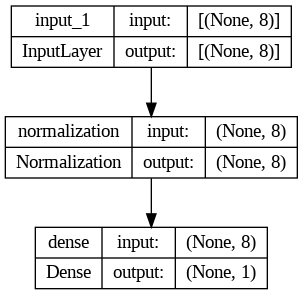

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber #if we have many outliers we use mean absolute error, if we have less outliers, we use mean squared error

In [ ]:
model.compile(loss=MeanAbsoluteError())

In [ ]:
#Stochastic Gradient Descent
#w = w - lr(derivative of lr/derivative of weight)
#small learning rate means small update in weight

In [ ]:
model.fit(X,Y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 338765.7500
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 337063.6875
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 335452.4062
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 333841.9688
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 332231.1250
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 330636.6875
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 329029.8125
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 327420.4062
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 325813.5938
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 324203.7500
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 322595.2812
Epoch 12/100
32/32 [==============================] - 0s 2ms/st

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(),loss=MeanAbsoluteError())
history=model.fit(X,Y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 197537.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 196753.2500
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 195963.5156
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 195205.6562
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 194482.1250
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 193761.2031
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 193046.2969
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 192345.9531
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 191676.2031
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 191011.9375
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 190385.2344
Epoch 12/100
32/32 [==============================] - 0s 2ms/st

In [ ]:
history.history

{'loss': [197537.5,
  196753.25,
  195963.515625,
  195205.65625,
  194482.125,
  193761.203125,
  193046.296875,
  192345.953125,
  191676.203125,
  191011.9375,
  190385.234375,
  189793.28125,
  189213.875,
  188686.640625,
  188158.671875,
  187629.765625,
  187122.015625,
  186601.25,
  186124.71875,
  185653.046875,
  185154.390625,
  184686.15625,
  184212.765625,
  183768.53125,
  183336.25,
  182934.484375,
  182536.046875,
  182161.578125,
  181787.8125,
  181436.015625,
  181096.640625,
  180765.3125,
  180462.0625,
  180151.15625,
  179843.53125,
  179548.203125,
  179240.578125,
  178957.09375,
  178677.3125,
  178405.890625,
  178152.5,
  177889.625,
  177655.09375,
  177404.71875,
  177170.265625,
  176950.953125,
  176743.3125,
  176544.046875,
  176346.609375,
  176156.65625,
  175973.421875,
  175797.59375,
  175626.765625,
  175459.265625,
  175301.25,
  175155.453125,
  175009.4375,
  174875.265625,
  174735.59375,
  174609.703125,
  174493.625,
  174381.734375,
  1

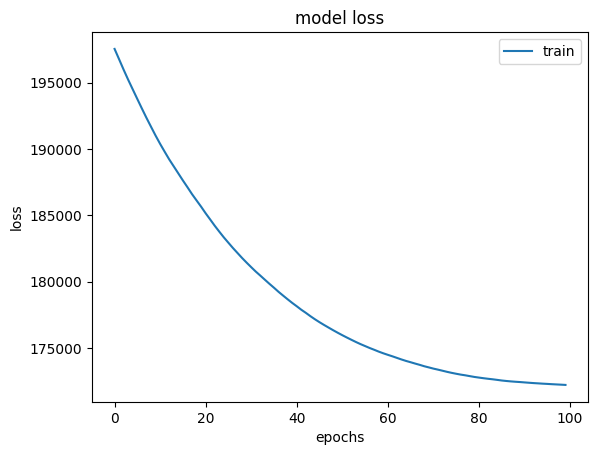

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [ ]:
model.compile(optimizer=Adam(learning_rate=1),loss=MeanAbsoluteError())
history_2=model.fit(X,Y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 175768.4531
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 172244.6719
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 170537.9688
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 170560.0469
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 168893.2031
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 168684.4844
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 166839.7656
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 166670.4375
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 165537.2969
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 164538.3125
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 162881.4219
Epoch 12/100
32/32 [==============================] - 0s 2ms/st

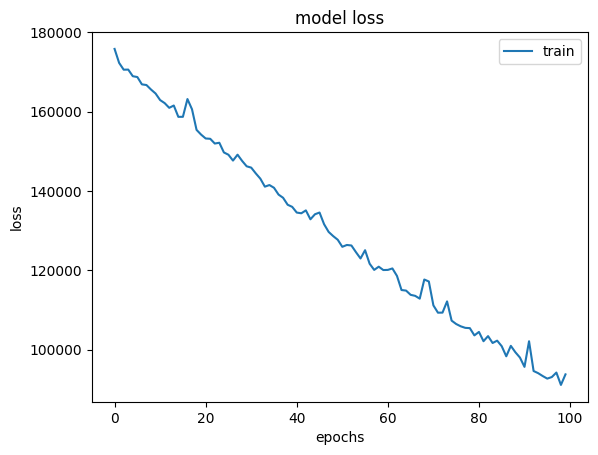

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
model.compile(optimizer=Adam(learning_rate=1),loss=MeanAbsoluteError(),metrics=RootMeanSquaredError())
history_3=model.fit(X,Y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 90919.2344 - root_mean_squared_error: 111497.1406
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 91474.2188 - root_mean_squared_error: 112116.0703
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 90836.3203 - root_mean_squared_error: 111916.7266
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 90242.9141 - root_mean_squared_error: 110251.4688
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 87944.6953 - root_mean_squared_error: 108477.0156
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 87296.4922 - root_mean_squared_error: 106946.2656
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 89438.3516 - root_mean_squared_error: 109931.9062
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 91393.7422 - root_mean_squared_error: 111541.9453
Epoch 9/100
32/3

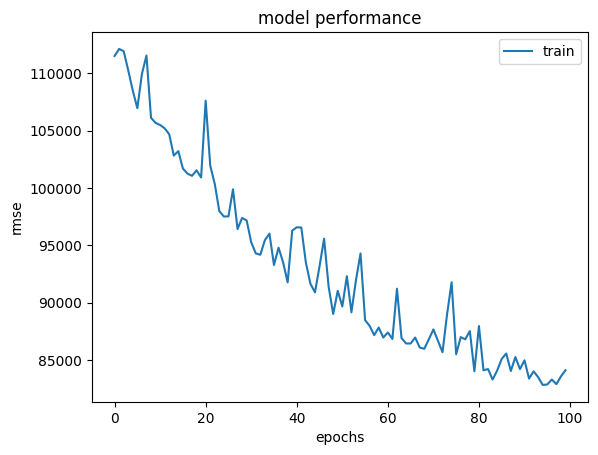

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_3.history['root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [ ]:
model.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 68600.9844 - root_mean_squared_error: 85104.0859


[68600.984375, 85104.0859375]

In [ ]:
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1
dataset_size = len(X)

X_train = X[:int(dataset_size*train_ratio)]
Y_train = Y[:int(dataset_size*train_ratio)]
print(X_train.shape,Y_train.shape)

(800, 8) (800, 1)


In [ ]:
X_val = X[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+val_ratio))]
Y_val = Y[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+val_ratio))]
print(X_val.shape,Y_val.shape)
X_test = X[int(dataset_size*(train_ratio+val_ratio)):]
Y_test = Y[int(dataset_size*(train_ratio+val_ratio)):]
print(X_test.shape,Y_test.shape)

(100, 8) (100, 1)
(100, 8) (100, 1)


In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [ ]:
model.compile(optimizer=Adam(),loss=MeanAbsoluteError(),metrics=RootMeanSquaredError())
history_4=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 70145.2734 - root_mean_squared_error: 86825.3594 - val_loss: 59148.4258 - val_root_mean_squared_error: 76055.3125
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 69949.8516 - root_mean_squared_error: 86560.2500 - val_loss: 59115.4297 - val_root_mean_squared_error: 75940.4141
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 69748.9297 - root_mean_squared_error: 86314.8203 - val_loss: 59088.5234 - val_root_mean_squared_error: 75857.4297
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 69574.5625 - root_mean_squared_error: 86087.9297 - val_loss: 59061.7734 - val_root_mean_squared_error: 75784.5391
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 69416.9219 - root_mean_squared_error: 85882.9688 - val_loss: 59032.3789 - val_root_mean_squared_error: 75715.4609
Epoch 6/100
25/25 [==============================] - 0s 4ms/step 

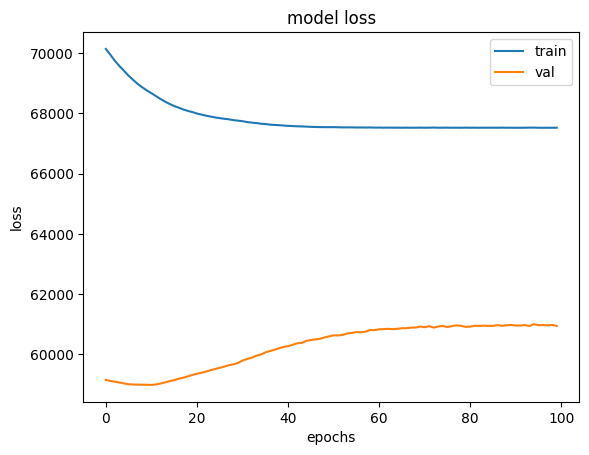

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 60409.9648 - root_mean_squared_error: 71136.8125


[60409.96484375, 71136.8125]

In [ ]:
#prediction
model.predict(X_test[0])

1/1 [==============================] - 0s 77ms/step


array([[240876.67]], dtype=float32)

In [ ]:
#to convert (,8) to (1,8)
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 47ms/step


array([[240876.67]], dtype=float32)

In [ ]:
Y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([206836.5], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

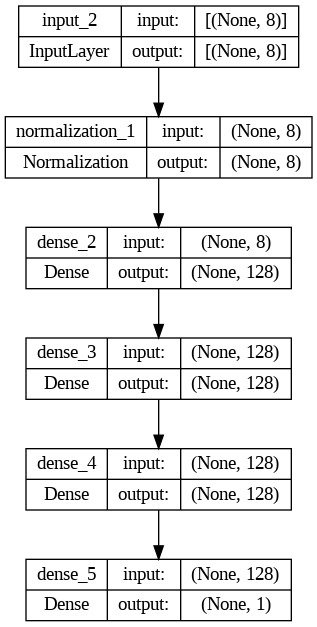

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1),loss=MeanAbsoluteError(),metrics=RootMeanSquaredError())

In [ ]:
history5 = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs = 100,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 142474.1250 - root_mean_squared_error: 191508.6562 - val_loss: 56785.4648 - val_root_mean_squared_error: 74015.9766
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 51747.6016 - root_mean_squared_error: 65159.6172 - val_loss: 44873.2734 - val_root_mean_squared_error: 57685.9258
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 41971.5469 - root_mean_squared_error: 52153.7773 - val_loss: 43261.3711 - val_root_mean_squared_error: 54988.3008
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 43599.6797 - root_mean_squared_error: 54635.8945 - val_loss: 42058.6133 - val_root_mean_squared_error: 53177.7188
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 40595.1211 - root_mean_squared_error: 50119.3828 - val_loss: 37580.9375 - val_root_mean_squared_error: 46506.7930
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

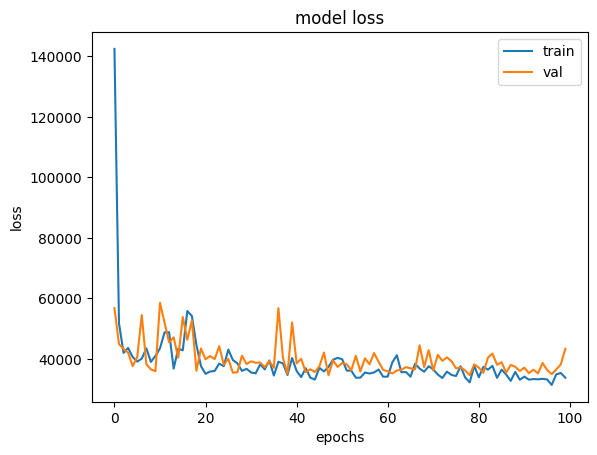

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

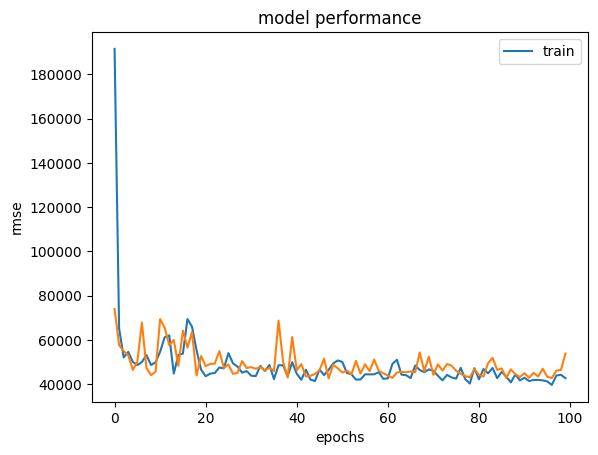

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history5.history['root_mean_squared_error'])
plt.plot(history5.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epochs')
plt.legend(['train'])
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 42735.8438 - root_mean_squared_error: 54130.4258


[42735.84375, 54130.42578125]

4/4 [==============================] - 0s 4ms/step


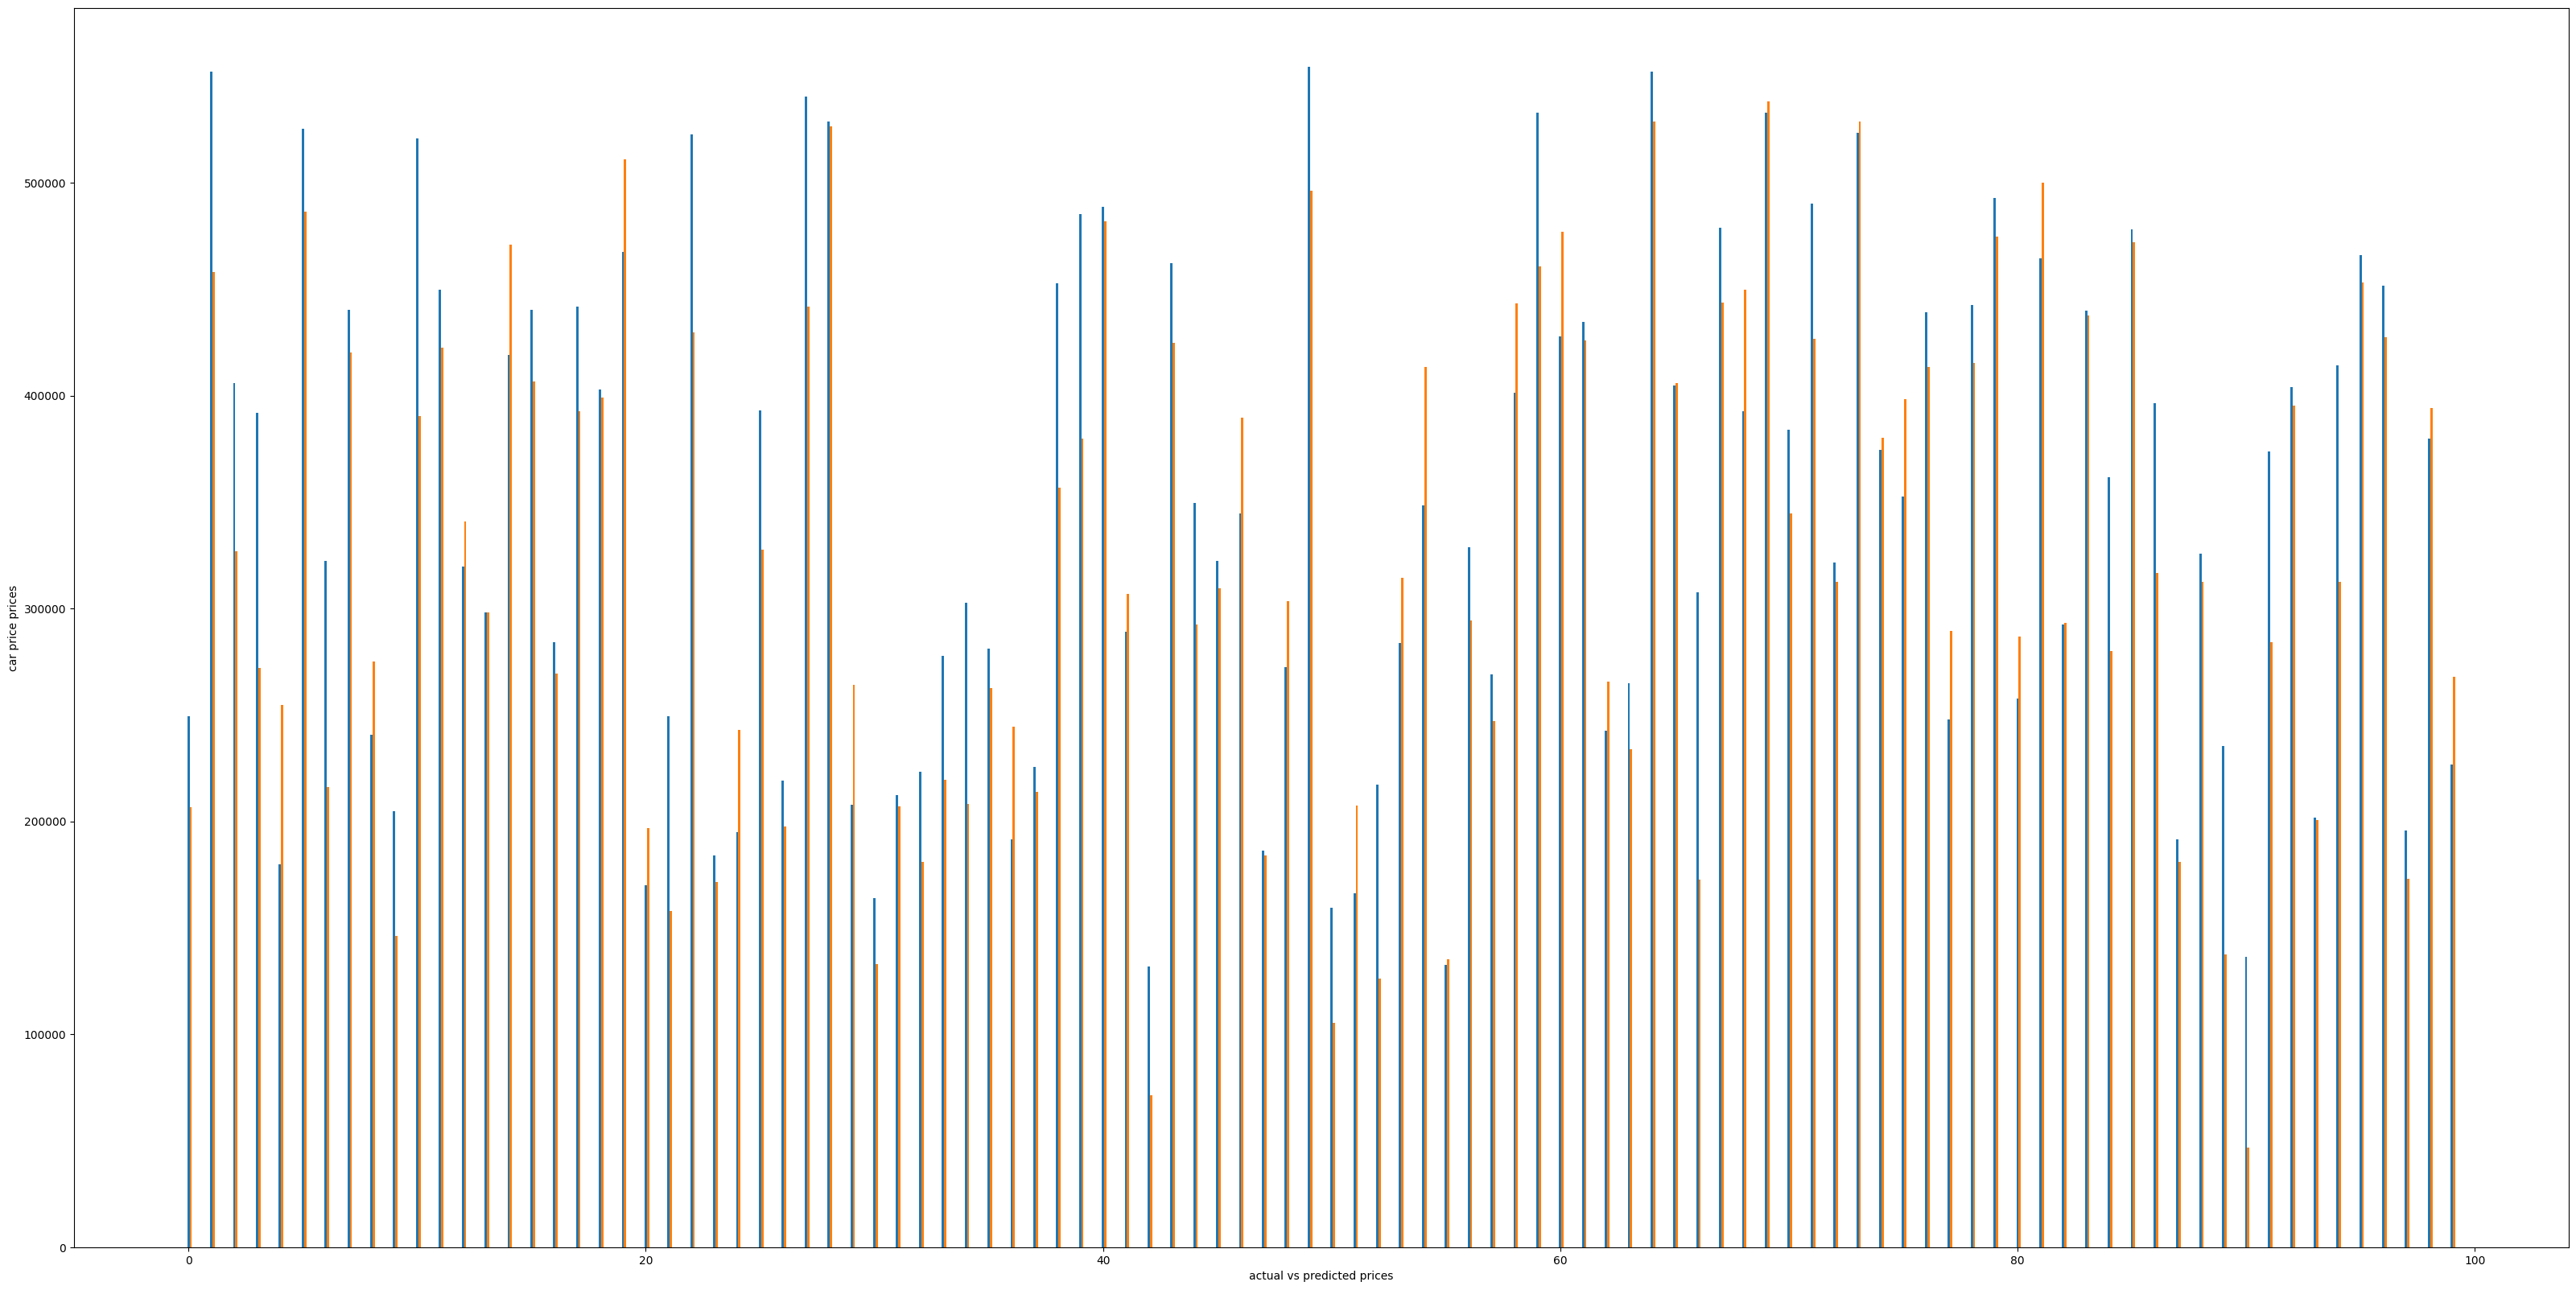

In [ ]:
Y_pred = list(model.predict(X_test)[:,0])
Y_true = list(Y_test[:,0].numpy())
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.1
plt.bar(ind,Y_pred,width,label='predicted car price')
plt.bar(ind+width,Y_true,width,label='actual car price')
plt.xlabel('actual vs predicted prices')
plt.ylabel('car price prices')
plt.show()

In [ ]:
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1
dataset_size = len(X)

X_train = X[:int(dataset_size*train_ratio)]
Y_train = Y[:int(dataset_size*train_ratio)]
print(X_train.shape,Y_train.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


(800, 8) (800, 1)


In [ ]:
for x,y in train_dataset:
    print(x,y)
    break

tf.Tensor(
[[3.00000e+00 5.16930e+04 3.00000e+00 1.00000e+00 1.20000e+01 1.38000e+02
  1.12000e+02 1.07000e+02]
 [6.00000e+00 9.25170e+04 5.00000e+00 1.00000e+01 1.30000e+01 1.97000e+02
  6.80000e+01 1.31000e+02]
 [3.00000e+00 1.00966e+05 1.00000e+00 5.00000e+00 1.10000e+01 1.57000e+02
  9.30000e+01 8.00000e+01]
 [6.00000e+00 1.46425e+05 1.00000e+00 1.00000e+01 1.10000e+01 1.49000e+02
  5.00000e+01 6.90000e+01]
 [3.00000e+00 1.01657e+05 3.00000e+00 4.00000e+00 1.20000e+01 1.78000e+02
  7.10000e+01 1.24000e+02]
 [4.00000e+00 8.56000e+04 1.00000e+00 4.00000e+00 1.40000e+01 1.81000e+02
  8.90000e+01 6.80000e+01]
 [6.00000e+00 1.34717e+05 4.00000e+00 1.00000e+01 1.10000e+01 1.64000e+02
  6.60000e+01 1.26000e+02]
 [3.00000e+00 6.18800e+04 3.00000e+00 8.00000e+00 1.00000e+01 1.79000e+02
  1.02000e+02 8.10000e+01]
 [7.00000e+00 7.84350e+04 5.00000e+00 3.00000e+00 1.50000e+01 1.92000e+02
  1.09000e+02 1.28000e+02]
 [2.00000e+00 9.29880e+04 2.00000e+00 1.00000e+00 1.20000e+01 1.70000e+02
  9.90

In [ ]:
X_val = X[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+val_ratio))]
Y_val = Y[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+val_ratio))]
print(X_val.shape,Y_val.shape)
X_test = X[int(dataset_size*(train_ratio+val_ratio)):]
Y_test = Y[int(dataset_size*(train_ratio+val_ratio)):]
print(X_test.shape,Y_test.shape)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,Y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,Y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

(100, 8) (100, 1)
(100, 8) (100, 1)


In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1)
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.1),loss=MeanAbsoluteError(),metrics=RootMeanSquaredError())
history6 = model.fit(train_dataset,validation_data=val_dataset,epochs = 100,verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

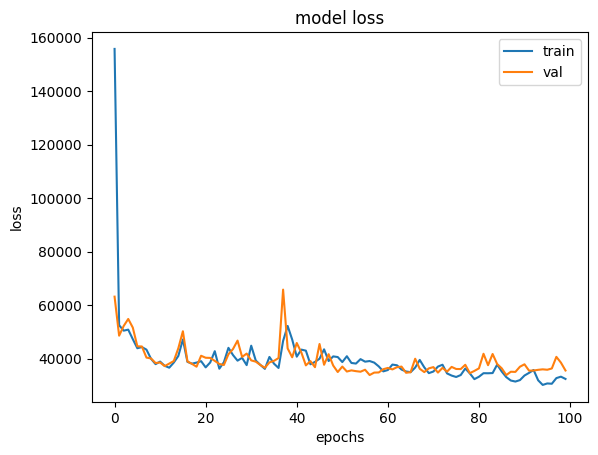

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 45188.7617 - root_mean_squared_error: 56165.3125


[45188.76171875, 56165.3125]

4/4 [==============================] - 0s 3ms/step


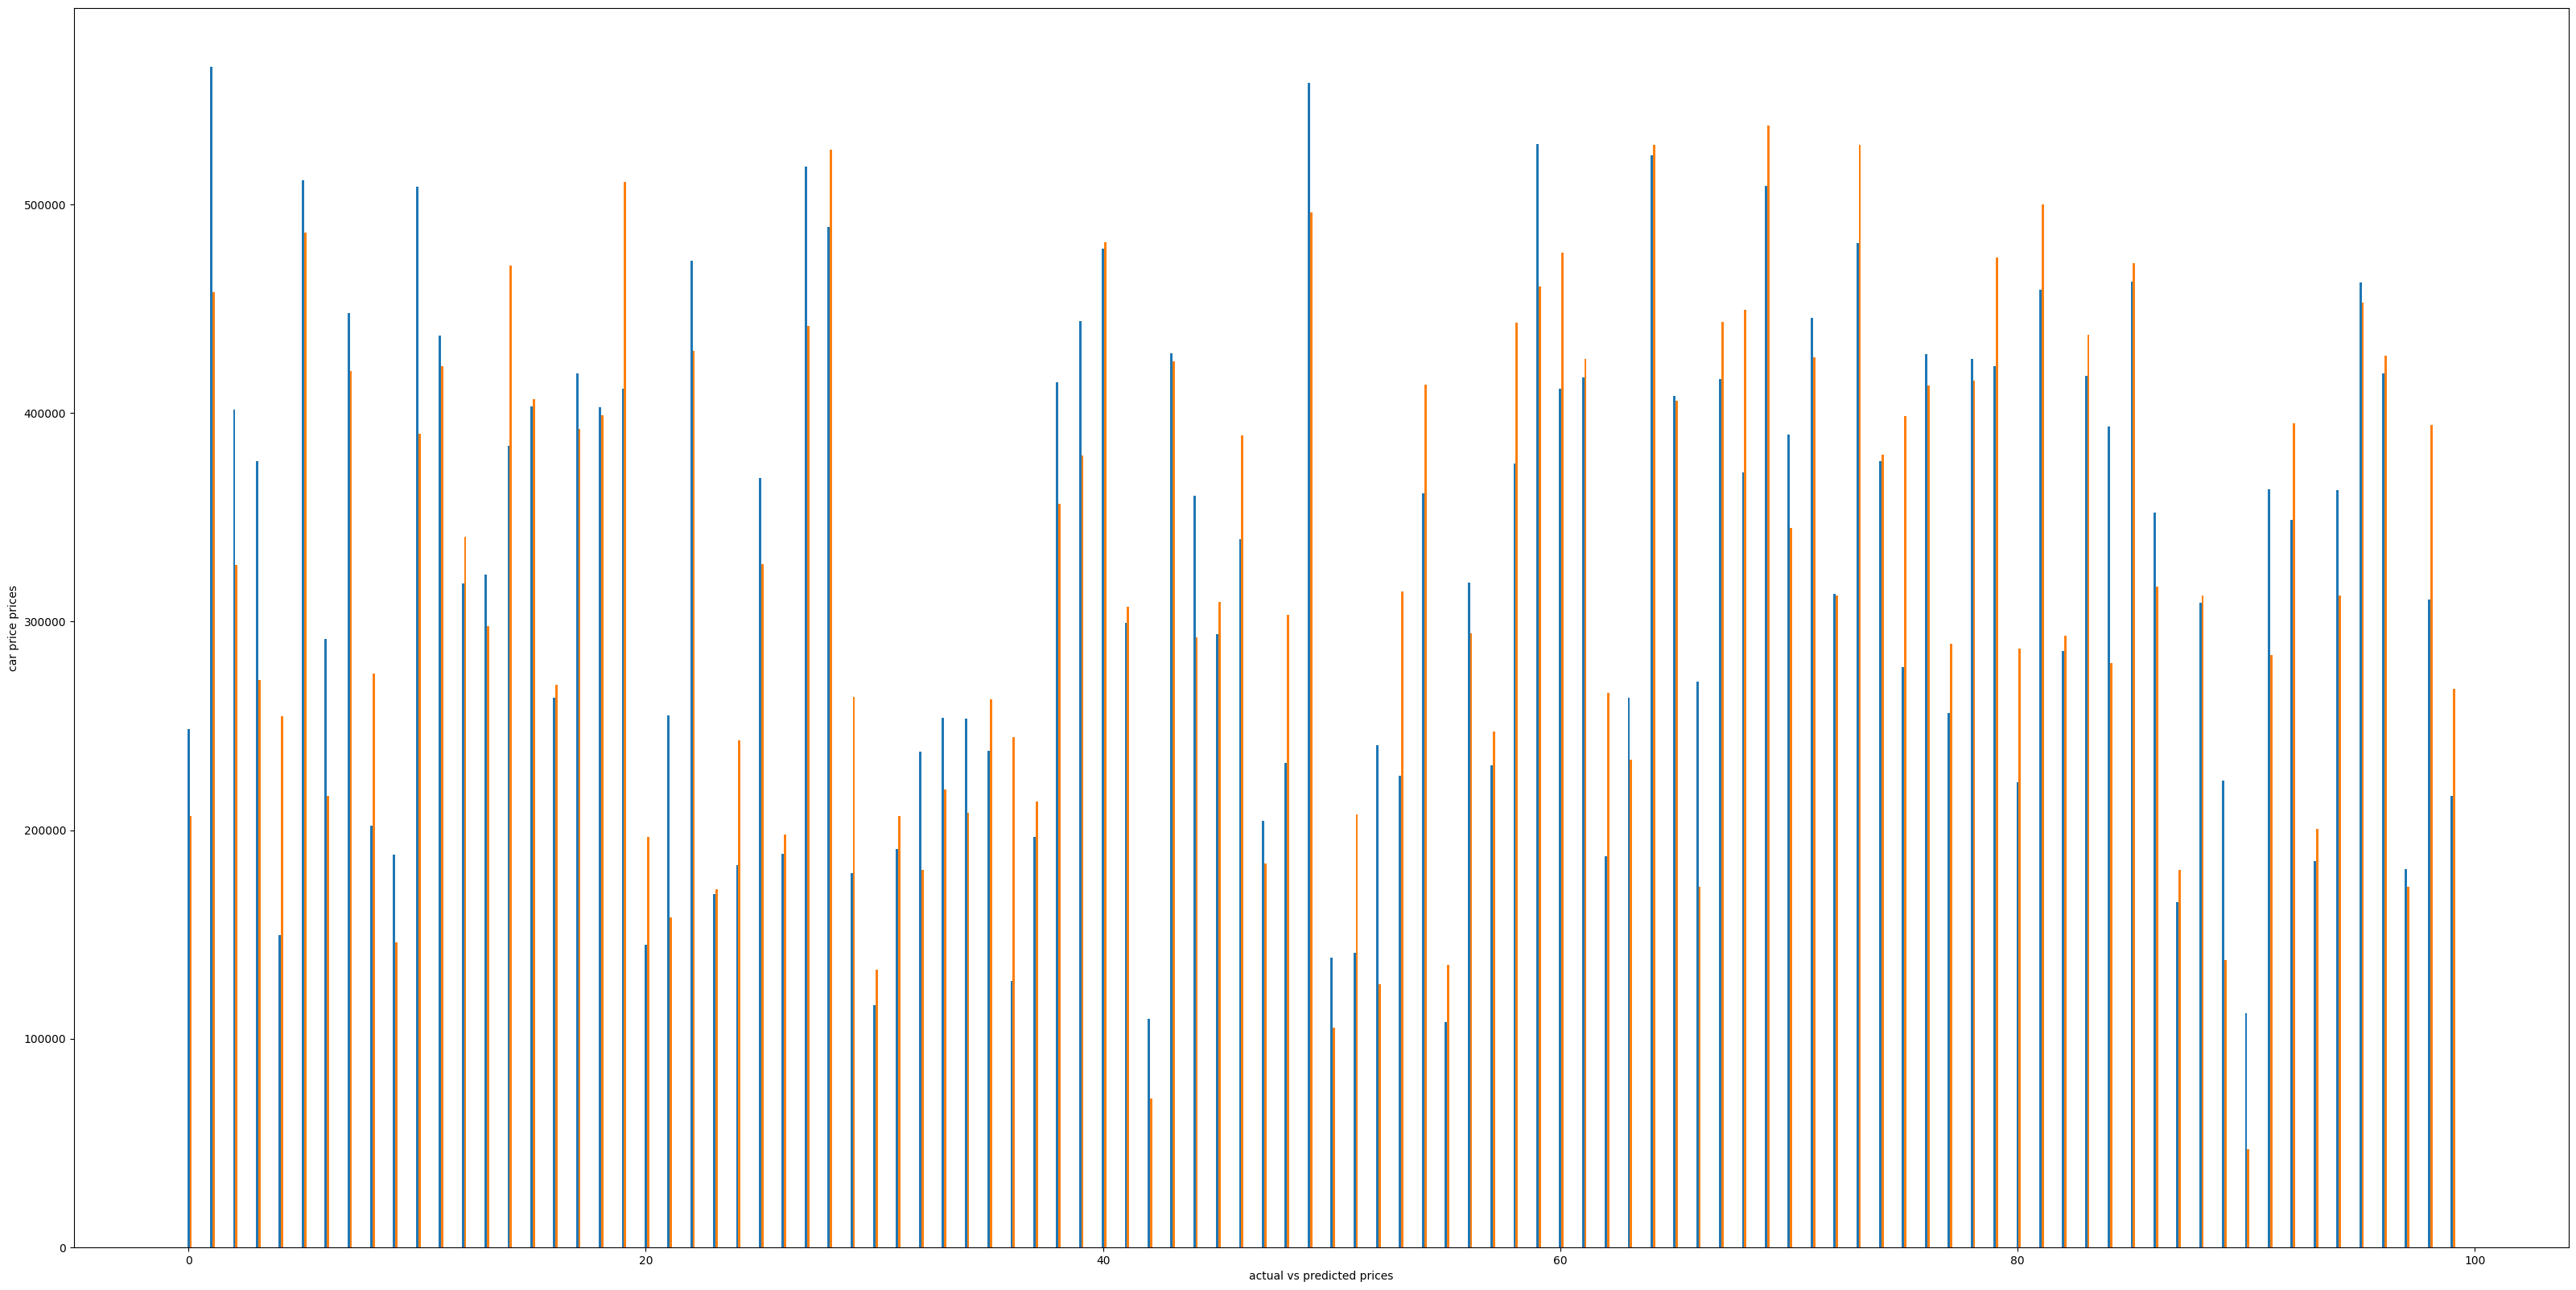

In [ ]:
Y_pred = list(model.predict(X_test)[:,0])
Y_true = list(Y_test[:,0].numpy())
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.1
plt.bar(ind,Y_pred,width,label='predicted car price')
plt.bar(ind+width,Y_true,width,label='actual car price')
plt.xlabel('actual vs predicted prices')
plt.ylabel('car price prices')
plt.show()

# CNN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
dataset, dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteCYFZMJ/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpa8x2i1p2tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
    # TRAIN_RATIO = 0.6
    # VAL_RATIO = 0.2
    # TEST_RATIO = 0.2
    #dataset = tf.data.Dataset.range(10)
    DATASET_SIZE = len(dataset)
    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
    #skipping the elements in train dataset
    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
    #skipping the elements in val dataset
    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
    return train_dataset,val_dataset,test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
#dataset = tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
#print(train_dataset,val_dataset,test_dataset)
#print(list(train_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

dataset visualization

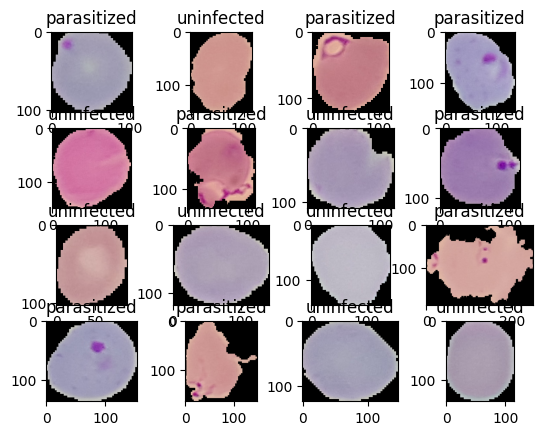

In [ ]:
for i, (image,label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))

In [ ]:
#in car prices we used standardization, here we are using normalization
#if all the values are around mean we use standardization, if all values are different from one another we use normalization
#standardization x = (x-μ)/δ
#normalization x = [x - x(min)]/[x(max)-x(min)]
#normalization for every pixel(from 0 - 255) is x-0/255-0 = x/255

In [ ]:
IM_SIZE = 224
def resizing(image,label):
    return tf.image.resize(image,(IM_SIZE, IM_SIZE)),label

In [ ]:
train_dataset = train_dataset.map(resizing)
val_dataset = val_dataset.map(resizing)
test_dataset = test_dataset.map(resizing)

In [ ]:
for image, label in train_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
IM_SIZE = 224
def resize_rescale(image,label):
    return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255.0,label

In [ ]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)

In [ ]:
for image, label in val_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
for image, label in train_dataset.take(1):
    print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
#output matrix = input matrix - kernel size + 1
#example : input size = 48x48, kernel size = 8 => output matrix = 48-8+1 = 41x41
#padding : sometimes the useful information located at the edge of the image, hence the kernel matrix only passes through it once, unlike in middle where kernel passes through 2,3,4 or more times. add padding to expand image inwhich kernel matrix passes through it many times
#stride : steps by which kernel matrix passes, default it is one we can modify it. increase the stride reduce the information extracted and reduce the output. Note: putting stride= 2 on a 7x7 matrix produce error hence stride is even number and cant pass through all cells
#new formula including padding and stride is, output matrix = [(input matrix - kernel size + 2*padding)/stride]+1

In [ ]:
#pooling layer formula, out = [(in - kernel)/s]+1
#max pooling is most commonly used method
#in max pooling, we provide sliding and kernel size. It only take the maximum value in each kernel
#there are average pooling as well

In [ ]:
#after the pooling layer we can repeat the above steps one more time
#then comes the flatten layer which convert all the matrices into a single array
#then comes the dense layer

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6,kernel_size=3, strides=1, padding = 'valid', activation= 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters=16,kernel_size=3, strides=1, padding = 'valid', activation= 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = "relu"),
    BatchNormalization(),
    Dense(10, activation = "relu"),
    BatchNormalization(),
    Dense(1, activation = "sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
#loss calculation
y_true = [0]
y_pred = [0.8]
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6094375>

In [ ]:
y_true = [0,1,0]
y_pred = [0.8,0.3,0.8]
#when the output is between 0 and 1 then from_logits=True, else from_logits=False
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9655188>

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy'
              )

In [ ]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs = 100,verbose=1)

Epoch 1/100
689/689 [==============================] - 815s 1s/step - loss: 0.4936 - accuracy: 0.7502 - val_loss: 2.0589 - val_accuracy: 0.6581
Epoch 2/100
689/689 [==============================] - 810s 1s/step - loss: 0.2195 - accuracy: 0.9262 - val_loss: 0.5041 - val_accuracy: 0.9060
Epoch 3/100
486/689 [====================>.........] - ETA: 3:35 - loss: 0.1936 - accuracy: 0.9345

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(test_dataset)

Functional api -> layers can be called as a function

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization, Input
from tensorflow.keras.models import Model
IM_SIZE = 224
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name= 'lenet model'),
x = Conv2D(filters=6,kernel_size=3, strides=1, padding = 'valid', activation= 'relu')(func_input[0])
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides = 2)(x)
x = Conv2D(filters=16,kernel_size=3, strides=1, padding = 'valid', activation= 'relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size = 2, strides = 2)(x)

feature_extractor_model = Model(func_input, output,name = "feature_extractor")

feature_extractor_model.summary()

Model: "feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lenet model (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)

In [ ]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name= 'input image'),
x = feature_extractor_model(func_input)

x = Flatten()(x)

x= Dense(100, activation = "relu")(x)
x= BatchNormalization()(x)
x= Dense(10, activation = "relu")(x)
x= BatchNormalization()(x)
func_output= Dense(1, activation = "sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name = 'lenet_model')
lenet_model_func.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (Functio  (None, 54, 54, 16)        1136      
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                

In [ ]:
#using a sequential model as callable function
import tensorflow as tf
feature_extractor_sequential_model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6,kernel_size=3, strides=1, padding = 'valid', activation= 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Conv2D(filters=16,kernel_size=3, strides=1, padding = 'valid', activation= 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
])

feature_extractor_sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

In [ ]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name= 'input image'),
x = feature_extractor_sequential_model(func_input)

x = Flatten()(x)

x= Dense(100, activation = "relu")(x)
x= BatchNormalization()(x)
x= Dense(10, activation = "relu")(x)
x= BatchNormalization()(x)
func_output= Dense(1, activation = "sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name = 'lenet_model')
lenet_model_func.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 54, 54, 16)        1136      
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                       

Model Subclassing

In [ ]:
from tensorflow.keras.layers import Layer
class FeatureExtractor(Layer):
    def __init__(self, filters, kernel_size, strides, padding, activation,pool_size):
        super(FeatureExtractor, self).__init__()
        self.conv_1 = Conv2D(filters=filters,kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
        self.batch_1 = BatchNormalization()
        self.pool_1 = MaxPool2D(pool_size=pool_size, strides=2*strides)

        self.conv_2 = Conv2D(filters=filters*2,kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
        self.batch_2 = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=pool_size, strides=2*strides)
    def call(self, x):
        # x = Input(shape=(IM_SIZE,IM_SIZE,3), name= 'input image')
        x = self.conv_1(x)
        x = self.batch_1(x)
        x = self.pool_1(x)
        x = self.conv_2(x)
        x = self.batch_2(x)
        x = self.pool_2(x)
        return x
feature_sub_classed = FeatureExtractor(8,3,1,"valid","relu",2)

In [ ]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name= 'input image'),
x = feature_sub_classed(func_input[0])

x = Flatten()(x)

x= Dense(100, activation = "relu")(x)
x= BatchNormalization()(x)
x= Dense(10, activation = "relu")(x)
x= BatchNormalization()(x)
func_output= Dense(1, activation = "sigmoid")(x)

lenet_model_func = Model(func_input, func_output, name = 'lenet_model')
lenet_model_func.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (Feature  (None, 54, 54, 16)        1488      
 Extractor)                                                      
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_9 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_14 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            (None, 10)                

In [ ]:
class LenetModel(Model):
    def __init__(self, filters, kernel_size, strides, padding, activation,pool_size):
        super(LenetModel, self).__init__()
        self.feature_extractor = FeatureExtractor(filters, kernel_size, strides, padding, activation,pool_size)
        self.flatten = Flatten()
        self.dense_1 = Dense(100, activation = "relu")
        self.batch_1 = BatchNormalization()
        self.dense_2 = Dense(10, activation = "relu")
        self.batch_2 = BatchNormalization()
        self.dense_3 = Dense(1, activation = "relu")

    def call(self, x):
        x = self.feature_extractor(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.batch_1(x)
        x = self.dense_2(x)
        x = self.batch_2(x)
        x = self.dense_3(x)
        return x

lenet_sub_classed = LenetModel(8,3,1,"valid","relu",2)
lenet_sub_classed(tf.zeros([1,224,224,3]))
lenet_sub_classed.summary()

Model: "lenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_1 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_12 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_18 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_19 (Ba  multiple                  

**Custom Dense layer**

In [ ]:
class CustomDense(Layer):
    def __init__(self, output_units, activation):
        super(CustomDense, self).__init__()
        self.output_units = output_units
        self.activation = activation
    def build(self, input_feature_shape):
        self.weight = self.add_weight(shape = (input_feature_shape[-1], self.output_units), initializer = 'random_normal', trainable = True)
        self.biases = self.add_weight(shape = (self.output_units,),initializer = 'random_normal', trainable = True)
    def call(self, input_features):
        if self.activation == "relu":
            return tf.nn.relu(tf.matmul(input_features, self.weight) + self.biases)
        if self.activation == "sigmoid":
            return tf.math.sigmoid(tf.matmul(input_features, self.weight) + self.biases)
        else:
            tf.matmul(input_features, self.weight) + self.biases

In [ ]:
class LenetModel(Model):
    def __init__(self, filters, kernel_size, strides, padding, activation,pool_size):
        super(LenetModel, self).__init__()
        self.feature_extractor = FeatureExtractor(filters, kernel_size, strides, padding, activation,pool_size)
        self.flatten = Flatten()
        self.dense_1 = CustomDense(100, activation = "relu")
        self.batch_1 = BatchNormalization()
        self.dense_2 = CustomDense(10, activation = "relu")
        self.batch_2 = BatchNormalization()
        self.dense_3 = CustomDense(1, activation = "relu")

    def call(self, x):
        x = self.feature_extractor(x)
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.batch_1(x)
        x = self.dense_2(x)
        x = self.batch_2(x)
        x = self.dense_3(x)
        return x

lenet_sub_classed = LenetModel(8,3,1,"valid","relu",2)
lenet_sub_classed(tf.zeros([1,224,224,3]))
lenet_sub_classed.summary()

Model: "lenet_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_2 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 custom_dense (CustomDense)  multiple                  4665700   
                                                                 
 batch_normalization_22 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 custom_dense_1 (CustomDens  multiple                  1010      
 e)                                                              
                                                     

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
lenet_sub_classed.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy'
              )

In [ ]:
history = lenet_sub_classed.fit(train_dataset,validation_data=val_dataset,epochs = 100,verbose=1)

In [ ]:
 # false negative -> detecting i dont have malaria while i have malaria (dangerous)
# false positive -> detecting i have malaria while i dont have malaria

# TP = true positives, FP = false positives
# TN = true negatives, FN = false negatives

# presicion = (tp)/(-tp + fp)
# recall = (tp)/(tp + fn)
# accuracy = (tn + tp)/(tn + tp + fn + fp)
# fm score = (2PR)/(P+R)
# specificity = (tn)/(tn + fp)

# if we want to reduce false negative chose recall over other parameter, since fn is on denominator, the lesser fn, the higher recall

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization, Input, RandomFlip, RandomRotation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam
import sklearn
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

lenet_sub_classed.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = metrics
              )

history = lenet_sub_classed.fit(train_dataset,validation_data=val_dataset,epochs = 5,verbose=1)

Epoch 1/5
  2/689 [..............................] - ETA: 12:25 - loss: 2.9189 - tp: 1.0000 - fp: 0.0000e+00 - tn: 30.0000 - fn: 33.0000 - accuracy: 0.4844 - precision: 1.0000 - recall: 0.0294 - auc: 0.6304            

KeyboardInterrupt: 

In [ ]:
labels, inputs = [], []
for x,y in test_dataset.as_numpy_iterator():
    inputs.append(x)
    labels.append(y)

In [ ]:
labels1 = labels[:100]
labels1 = np.array(i[0] for i in labels1)
print(labels1)

<generator object <genexpr> at 0x7c778054d770>


In [ ]:
inputs_10 = inputs[:100]

In [ ]:
print(np.array(inputs).shape)
# print(np.array(input)[:,0,...].shape)

(2757, 224, 224, 3)


In [ ]:
predicted = lenet_sub_classed.predict(np.array(inputs_10))

4/4 [==============================] - 2s 239ms/step


In [ ]:
print(predicted[:,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
len([i[0] for i in predicted])

100

In [ ]:
np.array([0,5,7])

array([0, 5, 7])

In [ ]:
threshold = 0.5
cm = confusion_matrix(labels[0:100], predicted > threshold)
print(cm)
#[tn fp
#fn tp]

[[53  0]
 [47  0]]


Text(0.5, 58.7222222222222, 'predicted')

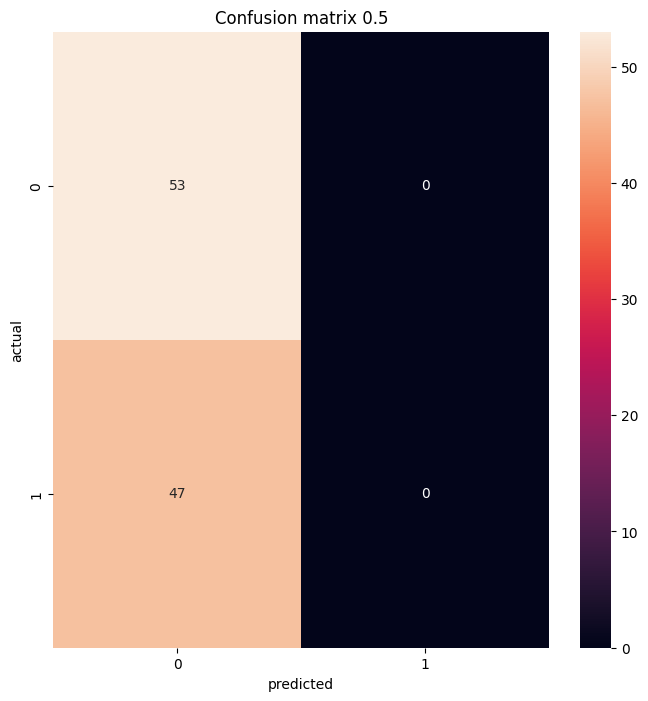

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.title(f'Confusion matrix {threshold}')
plt.ylabel('actual')
plt.xlabel('predicted')

2 2 2


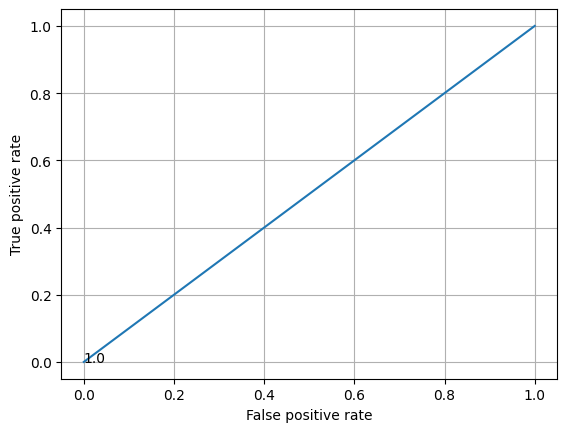

In [ ]:
fp, tp, thresholds = roc_curve(labels[0:100], predicted)
print(len(fp), len(tp), len(thresholds))

plt.plot(fp, tp)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.grid()
skip = 20
for i in range(0, len(thresholds), skip):
    plt.text(fp[i], tp[i], thresholds[i])
plt.show()

#take the optimal value from graph and set it as threshold time:10:17:59

Callbacks

In [ ]:
from tensorflow.keras.callbacks import Callback

In [ ]:
class LossCallback(Callback):
    def on_epoch_end(self, epoh, logs):
        print(f"\nfor epoh number {epoh} the model has a loss of {logs['loss']}")
    def on_batch_end(self, batch, logs):
        print(f"\nFor batch number {batch+1} the model has a loss of {logs}")

In [ ]:
history = lenet_sub_classed.fit(train_dataset.take(50),epochs = 5,verbose=1, callbacks=[LossCallback()])

Epoch 1/5

For batch number 1 the model has a loss of {'loss': 3.424306869506836, 'tp': 0.0, 'fp': 0.0, 'tn': 14.0, 'fn': 18.0, 'accuracy': 0.4375, 'precision': 0.0, 'recall': 0.0, 'auc': 0.615079402923584}
 1/50 [..............................] - ETA: 1:03 - loss: 3.4243 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 14.0000 - fn: 18.0000 - accuracy: 0.4375 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6151
For batch number 2 the model has a loss of {'loss': 3.130270004272461, 'tp': 2.0, 'fp': 3.0, 'tn': 28.0, 'fn': 31.0, 'accuracy': 0.46875, 'precision': 0.4000000059604645, 'recall': 0.06060606241226196, 'auc': 0.6080157160758972}
 2/50 [>.............................] - ETA: 46s - loss: 3.1303 - tp: 2.0000 - fp: 3.0000 - tn: 28.0000 - fn: 31.0000 - accuracy: 0.4688 - precision: 0.4000 - recall: 0.0606 - auc: 0.6080                 
For batch number 3 the model has a loss of {'loss': 2.6219887733459473, 'tp': 5.0, 'fp': 3.0, 'tn': 41.0, 'fn': 47.0, 'accuracy': 0.4791666567325592, 'p

KeyboardInterrupt: 

In [ ]:
csv_callback = tf.keras.callbacks.CSVLogger(
    'logs.csv', separator=',', append=True
)
history = lenet_sub_classed.fit(train_dataset.take(50),epochs = 5,verbose=1, callbacks=[csv_callback])

Epoch 1/5


KeyboardInterrupt: 

Early stopping

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # set which parameter you want to monitor
    min_delta=0, # minimum value to go above the validation loss ex: 0.1
    patience=0, #number of epohs with no improvement
    verbose=0,
    mode='auto', # do you want to monitor the val_loss to be increase or decrease set min, max, auto
    baseline=None,
    restore_best_weights=False, #get the best weight according to the given parameter, in this case val_loss
    start_from_epoch=0
)
history = lenet_sub_classed.fit(train_dataset.take(50),validation_data=val_dataset.take(20),epochs = 5,verbose=1, callbacks=[csv_callback, es_callback])

Epoch 1/5
 3/50 [>.............................] - ETA: 1:32 - loss: 1.9783 - tp: 3.0000 - fp: 0.0000e+00 - tn: 44.0000 - fn: 49.0000 - accuracy: 0.4896 - precision: 1.0000 - recall: 0.0577 - auc: 0.7321

KeyboardInterrupt: 

**Learning rate scheduler**

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def scheduler(epoch, lr):
  if epoch < 3:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

scheduler_callback = LearningRateScheduler(scheduler, verbose = 1)

In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]

lenet_sub_classed.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = metrics
              )

history = lenet_sub_classed.fit(train_dataset.take(30),validation_data=val_dataset.take(10),epochs = 5,verbose=1, callbacks=[scheduler_callback])

NameError: name 'TruePositives' is not defined

In [ ]:
#mxnet.apache.org tells more about learning rate

model checkpoint

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="weights_%s_%s/"%(self.target,self.mode),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

NameError: name 'self' is not defined

In [ ]:
checkpoint_filepath = '/content/sample_data/best_model'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = lenet_sub_classed.fit(train_dataset.take(10),validation_data=val_dataset.take(2),epochs = 5,verbose=1, callbacks=[checkpoint])

Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 1.1390 - tp: 112.0000 - fp: 50.0000 - tn: 104.0000 - fn: 54.0000 - accuracy: 0.6750 - precision: 0.6914 - recall: 0.6747 - auc: 0.7377

AttributeError: 'NoneType' object has no attribute 'replace'

reduce learning rate as the training goes on

In [ ]:
plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1, # if the lr is set to 0.2, it become 0.2 * 0.1
    patience=2, #check two epohs if there is no improvement, the the learning rate drops
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)

In [ ]:
history = lenet_sub_classed.fit(train_dataset.take(10),validation_data=val_dataset.take(2),epochs = 5,verbose=1, callbacks=[plateau_callback])

Epoch 1/5
10/10 [==============================] - 36s 3s/step - loss: 1.5586 - accuracy: 0.4844 - val_loss: 7.7125 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/5
10/10 [==============================] - 33s 4s/step - loss: 1.3619 - accuracy: 0.4844 - val_loss: 7.2304 - val_accuracy: 0.5312 - lr: 0.0100
Epoch 3/5
10/10 [==============================] - 33s 4s/step - loss: 1.2776 - accuracy: 0.4875 - val_loss: 7.7125 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/5
10/10 [==============================] - ETA: 0s - loss: 1.2830 - accuracy: 0.5969
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
10/10 [==============================] - 28s 3s/step - loss: 1.2830 - accuracy: 0.5969 - val_loss: 7.7125 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 5/5
10/10 [==============================] - 33s 4s/step - loss: 1.1223 - accuracy: 0.7437 - val_loss: 8.4355 - val_accuracy: 0.4531 - lr: 1.0000e-03


In [ ]:
#time 11.29
#dropout = dropping out unnecessary neurons, r = 0.333 -> drops out one third of neurons
#Data augmentation = converting one dataset into more datasets by rotating, changing contrast, etc..
#regularization = L1 regularization, L2 regularization(weight decay)
#early stopping = stop the training if the validation accuracy isnt increasing any further

Dropout, regularizer

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization, Input, Dropout
from tensorflow.keras.regularizers import L1, L2

dropout_rate = 0.2

model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6,kernel_size=3, strides=1, padding = 'valid', activation= 'relu', kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Dropout(rate = dropout_rate),

    Conv2D(filters=16,kernel_size=3, strides=1, padding = 'valid', activation= 'relu', kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = "relu", kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Dropout(rate = dropout_rate),

    Dense(10, activation = "relu", kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Dense(1, activation = "sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)     

Image visualization

In [ ]:
def visualizer(original, augmented1, augmented2, augmented3):
    plt.subplot(2,2,1)
    plt.imshow(original.numpy().astype("uint8"))

    plt.subplot(2,2,2)
    plt.imshow(augmented1.numpy().astype("uint8"))

    plt.subplot(2,2,3)
    plt.imshow(augmented2.numpy().astype("uint8"))

    plt.subplot(2,2,4)
    plt.imshow(augmented3.numpy().astype("uint8"))

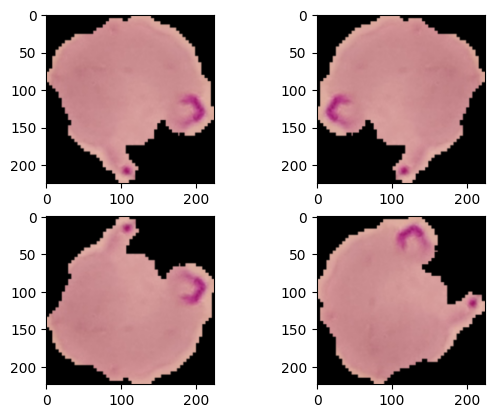

In [ ]:
original_image, label = next(iter(test_dataset))
augmented_image = tf.image.flip_left_right(original_image)
augmented_image2 = tf.image.flip_up_down(original_image)
augmented_image3 = tf.image.adjust_saturation(original_image, 0.5)
augmented_image4 = tf.image.rot90(original_image)
visualizer(original_image, augmented_image, augmented_image2, augmented_image4)

In [ ]:
im_size = 224
def resize_rescale(image, label):
    return tf.image.resize(image, (im_size, im_size))/255.0, label

In [ ]:
def image_adjustment(image, label):

    image, label = resize_rescale(image, label)

    image = tf.image.rot90(image)
    image = tf.image.adjust_saturation(image, saturation_factor = 0.3)
    image = tf.image.flip_left_right(image)

    return image, label

In [ ]:
im_size = 224
resize_rescale_layers = tf.keras.Sequential([
    # Resizing(im_size, im_size),
    Rescaling(1.0/255)
])

In [ ]:
train_dataset = train_dataset.map(resize_rescale_layers)
test_dataset = test_dataset.map(resize_rescale_layers)
val_dataset = val_dataset.map(resize_rescale_layers)

In [ ]:
augment_layers = tf.keras.Sequential([
    RandomRotation(factor=(0.25, 0.2501)),
    RandomFlip(mode="horizontal")
])

In [ ]:
def augment_layer(image, labels):
    return augment_layers(resize_rescale_layers(image), training=True), labels

In [ ]:
BATCH_SIZE = 32
train_dataset = (train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).map(augment_layers).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
val_dataset = (val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).map(augment_layers).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

In [ ]:
metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
model.compile(optimizer=Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = metrics
              )

In [ ]:
history = model.fit(train_dataset.take(10),validation_data=val_dataset.take(2),epochs = 5,verbose=1)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, None, 224, 224, 3)


Custom Dataset

In [ ]:
train_dataset, val_test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/home/greywind/machine_learning_course/cell_images",
    labels='inferred',
    label_mode="binary",
    class_names=["Parasitized","Uninfected"],
    color_mode='rgb',
    batch_size=None,
    image_size=(224, 224),
    shuffle=True,
    seed=5,
    validation_split=0.3,
    subset="both",
    interpolation='gaussian',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 27558 files belonging to 2 classes.
Using 19291 files for training.
Using 8267 files for validation.


In [ ]:
def splits(dataset, TEST_RATIO, VAL_RATIO):
    # TRAIN_RATIO = 0.6
    # VAL_RATIO = 0.2
    # TEST_RATIO = 0.2
    #dataset = tf.data.Dataset.range(10)
    DATASET_SIZE = len(dataset)
    test_dataset = dataset.take(int(TEST_RATIO*DATASET_SIZE))
    val_dataset = dataset.skip(int(TEST_RATIO*DATASET_SIZE))
    return test_dataset, val_dataset

In [ ]:
TEST_RATIO = 0.6
VAL_RATIO = 0.4
#dataset = tf.data.Dataset.range(10)
test_dataset, val_dataset = splits(val_test_dataset,TEST_RATIO, VAL_RATIO)

In [ ]:
train_dataset.class_names

['Parasitized', 'Uninfected']

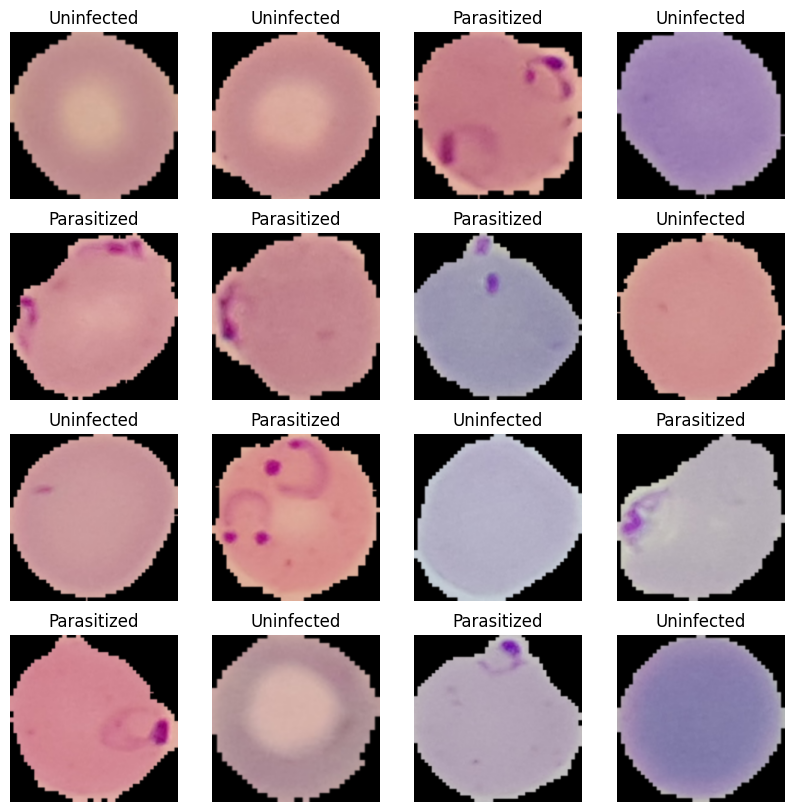

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image,label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(train_dataset.class_names[int(label.numpy()[0])])
    plt.axis("off")


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization, Input, Dropout
from tensorflow.keras.regularizers import L1, L2

dropout_rate = 0.2
IM_SIZE = 224

resize_rescale_layers = tf.keras.Sequential([
    Resizing(IM_SIZE, IM_SIZE),
    Rescaling(1.0/255)
])

class rot90(Layer):
    def __init__(self):
        super().__init__()
    def call(self,image):
        return tf.image.rot90(image, k = tf.random.uniform(shape=[], minval=0, maxval=2, dtype=tf.int32))

augment_layers = tf.keras.Sequential([
#    RandomRotation(factor=(0.25, 0.2501)),
    rot90(),
    RandomFlip(mode="horizontal")
])

model = tf.keras.Sequential([
    InputLayer(input_shape=(None,None,3)),

    resize_rescale_layers, #you can pass any image irrespective of their dimentions the model will automatically resize and augment
    augment_layers,

    Conv2D(filters=6,kernel_size=3, strides=1, padding = 'valid', activation= 'relu', kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Dropout(rate = dropout_rate),

    Conv2D(filters=16,kernel_size=3, strides=1, padding = 'valid', activation= 'relu', kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = "relu", kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Dropout(rate = dropout_rate),

    Dense(10, activation = "relu", kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Dense(1, activation = "sigmoid")
])

model.summary()


BATCH_SIZE = 32
train_dataset = (train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))
val_dataset = (val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
model.compile(optimizer=Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = metrics,
#              run_eagerly = True,                    #To show detailed error messages, but trains very slow
              )
history = model.fit(train_dataset.take(100),validation_data=val_dataset.take(20),epochs = 5,verbose=1)
#12.37.58 important

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 111, 111, 6)      

In [ ]:
image = cv2.imread("/home/greywind/machine_learning_course/cell_images/Parasitized/C132P93ThinF_IMG_20151004_152642_cell_40.png")
print(image.shape)
image = tf.expand_dims(image,axis=0)
print(image.shape)

(121, 130, 3)
(1, 121, 130, 3)


In [ ]:
model.predict(image)

1/1 [==============================] - 0s 278ms/step


array([[0.957088]], dtype=float32)

mixup data augmentation

In [ ]:
lamda = tfp.distributions.Beta(0.2,0.2)
print(lamda.sample(1)[0].numpy())

0.004591263


(224, 224, 3) tf.Tensor(0.67108166, shape=(), dtype=float32)


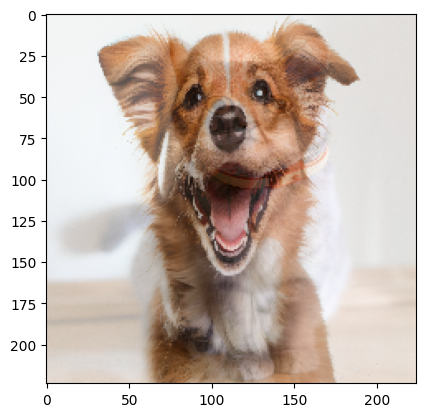

In [ ]:
image_1 = cv2.cvtColor(cv2.resize(cv2.imread('cat.jpg'), (224,224)), cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(cv2.resize(cv2.imread('dog.jpg'), (224,224)), cv2.COLOR_BGR2RGB)

label_1 = 0
label_2 = 1

lamda = tfp.distributions.Beta(0.2,0.2)
lamda = lamda.sample(1)[0]

image = lamda*image_1 + (1-lamda)*image_2
label = lamda*label_1 + (1-lamda)*label_2
print(image.shape, label)
plt.imshow(image/255)

In [ ]:
IM_SIZE = 224
def resize_rescale(image,label):
    return tf.image.resize(image, (IM_SIZE,IM_SIZE))/255.0, label

train_dataset_1 = (train_dataset.take(100).shuffle(buffer_size = 8, reshuffle_each_iteration = True)).map(resize_rescale)
train_dataset_2 = (train_dataset.take(100).shuffle(buffer_size = 8, reshuffle_each_iteration = True)).map(resize_rescale)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [ ]:
def mixup(train_dataset_1, train_dataset_2):
    (image_1,label_1) = train_dataset_1
    (image_2, label_2) = train_dataset_2

    lamda = tfp.distributions.Beta(0.4,0.4)
    lamda = lamda.sample(1)[0]

    image = lamda*image_1 + (1-lamda)*image_2
    label = lamda*label_1 + (1-lamda)*label_2

    return image, label

In [ ]:
BATCH_SIZE = 32
train_dataset = (mixed_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).map(mixup).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

In [ ]:
val_dataset = (val_dataset.map(resize_rescale).batch(BATCH_SIZE))

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten,InputLayer, BatchNormalization, Input, Dropout
from tensorflow.keras.regularizers import L1, L2

dropout_rate = 0.2
IM_SIZE = 224

resize_rescale_layers = tf.keras.Sequential([
    Resizing(IM_SIZE, IM_SIZE),
    Rescaling(1.0/255)
])

class rot90(Layer):
    def __init__(self):
        super().__init__()
    def call(self,image):
        return tf.image.rot90(image, k = tf.random.uniform(shape=[], minval=0, maxval=2, dtype=tf.int32))

augment_layers = tf.keras.Sequential([
#    RandomRotation(factor=(0.25, 0.2501)),
    rot90(),
    RandomFlip(mode="horizontal")
])

model = tf.keras.Sequential([
    InputLayer(input_shape=(None,None,3)),

    resize_rescale_layers, #you can pass any image irrespective of their dimentions the model will automatically resize and augment
    augment_layers,

    Conv2D(filters=6,kernel_size=3, strides=1, padding = 'valid', activation= 'relu', kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    Dropout(rate = dropout_rate),

    Conv2D(filters=16,kernel_size=3, strides=1, padding = 'valid', activation= 'relu', kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = "relu", kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Dropout(rate = dropout_rate),

    Dense(10, activation = "relu", kernel_regularizer = L2(0.01)),
    BatchNormalization(),
    Dense(1, activation = "sigmoid")
])

model.summary()


BATCH_SIZE = 32

metrics = [TruePositives(name='tp'), FalsePositives(name='fp'), TrueNegatives(name='tn'), FalseNegatives(name='fn'), BinaryAccuracy(name='accuracy'), Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
model.compile(optimizer=Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = metrics,
#              run_eagerly = True,                    #To show detailed error messages, but trains very slow
              )
history = model.fit(train_dataset, validation_data=val_dataset.take(20),epochs = 5,verbose=1)
#12.37.58 important

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)      

cutmix data augmentation

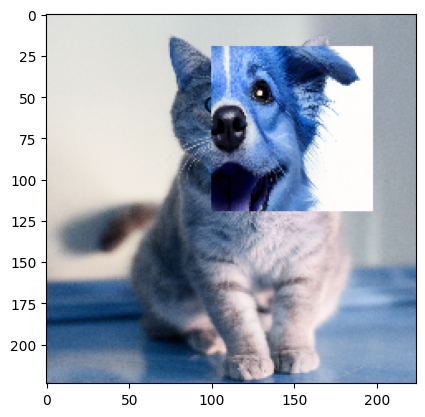

In [ ]:
image_1 = cv2.resize(cv2.imread('cat.jpg'), (IM_SIZE,IM_SIZE))

image_2 = cv2.resize(cv2.imread('dog.jpg'), (IM_SIZE,IM_SIZE))

crop = tf.image.crop_to_bounding_box(
    image_2, 20,100,100,98
)

image_4 = tf.image.pad_to_bounding_box(
    crop, 20,100,IM_SIZE,IM_SIZE
)

crop = tf.image.crop_to_bounding_box(
    image_1, 20,100,100,98
)
image_5 = tf.image.pad_to_bounding_box(
    crop, 20,100,IM_SIZE,IM_SIZE
)


plt.imshow(image_1 - image_5 + image_4)


In [ ]:
def mixup(train_dataset_1, train_dataset_2):
    (image_1,label_1) = train_dataset_1
    (image_2, label_2) = train_dataset_2

    crop_2 = tf.image.crop_to_bounding_box(
        image_2, 20,100,100,98
    )

    pad_2 = tf.image.pad_to_bounding_box(
        crop_2, 20,100,IM_SIZE,IM_SIZE
    )

    crop_1 = tf.image.crop_to_bounding_box(
        image_1, 20,100,100,98
    )
    pad_1 = tf.image.pad_to_bounding_box(
        crop_1, 20,100,IM_SIZE,IM_SIZE
    )
    image = image_1 - pad_1 + pad_2
    return image, label

In [ ]:
# Albumentation - best library for data augmentation
#crop, resize, mirror the image along with annotations so we don't have to annotate each image modifications and create multiple datasets

2

In [ ]:
!pip install -U albumentations

In [ ]:
import albumentations as A

In [ ]:
transforms = A.Compose([
    A.Resize(IM_SIZE,IM_SIZE),
    A.OneOf([
        A.HorizontalFlip(),
        A.VerticalFlip()
    ], p = 0.3),
    A.RandomRotate90(),
    A.RandomBrightnessContrast(brightness_limit=0.2,
                               contrast_limit=0.2,
                               always_apply=False,
                               p=0.5),
])

In [ ]:
13.53.18